## Daily Challenge: W2_D4

### Exploring the World Happiness Report with Matplotlib

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Step 1: Load and Inspect Data

In [20]:
# Load data
df = pd.read_csv('2019.CSV')

# Display first rows to understand data structure
print(df.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [11]:
# Show info about columns, types, and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


In [12]:
# Get basic descriptive statistics
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

In [16]:
print(df.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


#### Step 2: Data Preprocessing

In [23]:
# Columns important for analysis
key_columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Country or region']

In [24]:
# Remove rows with missing values in these columns
df_clean = df.dropna(subset=key_columns)

In [25]:
# Check again for missing values to confirm cleanup
print(df_clean.isnull().sum())

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [33]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl (10.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\julia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [34]:
# Using sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country_code'] = le.fit_transform(df['Country or region'])

#### Step 3: Analyze Relationship Between Social Support and Happiness Score

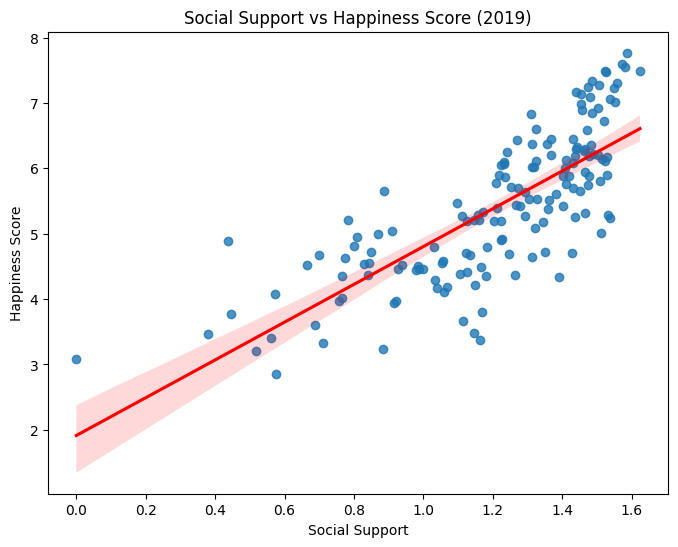

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
# Scatter plot with regression line
sns.regplot(data=df_clean, x='Social support', y='Score', line_kws={'color':'red'})
plt.title('Social Support vs Happiness Score (2019)')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

#### Step 4: Regional Comparisons of GDP and Health:

In [78]:
!pip install country_converter

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\julia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### 1: Import libraries

In [82]:
import country_converter as coco
import seaborn as sns
import matplotlib.pyplot as plt

#### 2: Assign Regions Using Country Converter and Custom Refinement

In [83]:
# Create a new 'Region' column by converting country names to continents using country_converter
df['Region'] = coco.convert(names=df['Country or region'], to='continent')

# Display the first few rows to check the mapping results
print(df[['Country or region', 'Region']].head())

# Make a copy of the DataFrame to avoid SettingWithCopyWarning when modifying columns
df = df.copy()

# Apply the custom function to refine the 'Region' column (splitting Americas and Middle East properly)
df.loc[:, 'Region'] = df.apply(assign_full_region, axis=1)

  Country or region  Region
0           Finland  Europe
1           Denmark  Europe
2            Norway  Europe
3           Iceland  Europe
4       Netherlands  Europe


#### 3: Define the region assignment function

In [ ]:
# Function to assign correct regions, splitting Americas and Middle East properly
def assign_full_region(row):
    middle_east_countries = [
        'Israel', 'United Arab Emirates', 'Saudi Arabia', 'Qatar',
        'Bahrain', 'Kuwait', 'Lebanon', 'Jordan', 'Iraq',
        'Iran', 'Yemen', 'Syria', 'Palestinian Territories'
    ]
    south_america = [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
        'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
    ]
    north_america = [
        'United States', 'Canada', 'Mexico', 'Guatemala', 'Panama',
        'Costa Rica', 'El Salvador', 'Honduras', 'Nicaragua', 'Jamaica',
        'Trinidad & Tobago', 'Dominican Republic'
    ]
    
    if row['Country or region'] in middle_east_countries:
        return 'Middle East'
    elif row['Country or region'] in south_america:
        return 'South America'
    elif row['Country or region'] in north_america:
        return 'North America'
    else:
        if row['Region'] == 'Americas':
            return 'South America'  # Default, change if needed
        return row['Region']


#### 4: Aggregate and sort the data

In [86]:
# Aggregate mean GDP and Healthy Life Expectancy by region
region_stats = df_clean.groupby('Region').agg({
    'GDP per capita': 'mean',
    'Healthy life expectancy': 'mean'
}).reset_index()

# Sort regions by ascending GDP per capita
region_stats = region_stats.sort_values(by='GDP per capita', ascending=True).reset_index(drop=True)


#### 5: Plot the data

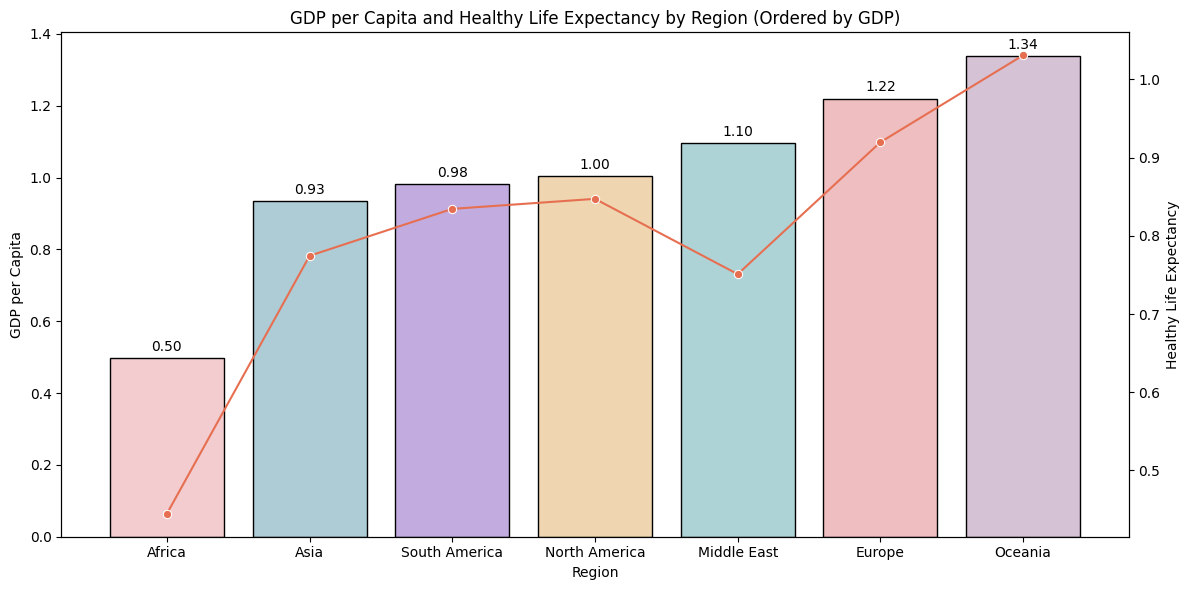

In [87]:
# Define pastel colors for the 7 regions
pastel_colors = [
    "#F9C6C9", "#A8D0DB", "#C1A3E8",
    "#FAD8A5", "#A7D8DE", "#F7B6B8", "#D8BFD8"
]
palette = sns.color_palette(pastel_colors, n_colors=7)

fig, ax1 = plt.subplots(figsize=(12,6))

# Barplot for GDP per capita
bars = sns.barplot(
    data=region_stats,
    x='Region',
    y='GDP per capita',
    ax=ax1,
    palette=palette,
    hue='Region',
    order=region_stats['Region'],
    legend=False,
    edgecolor='black'
)

ax1.set_ylabel('GDP per Capita')

# Add value annotations on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0,3),
                 textcoords='offset points',
                 ha='center', va='bottom')

# Secondary y-axis for Healthy Life Expectancy
ax2 = ax1.twinx()
sns.lineplot(
    data=region_stats,
    x='Region',
    y='Healthy life expectancy',
    ax=ax2,
    color='#e76f51',  # coral orange
    marker='o',
    sort=False
)
ax2.set_ylabel('Healthy Life Expectancy')

plt.title('GDP per Capita and Healthy Life Expectancy by Region (Ordered by GDP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Analysis of the Graph: "GDP per Capita and Healthy Life Expectancy by Region (Ordered by GDP)"
Title: The graph compares average GDP per capita and average healthy life expectancy across 7 distinct world regions, ordered by GDP per capita from lowest to highest.

##### Regional Insights:
Africa: Shows the lowest GDP per capita (~0.50) and the lowest healthy life expectancy (~0.44), indicating economic challenges are linked to lower health outcomes.

Asia: Has a moderate GDP per capita (~0.93) with a relatively high healthy life expectancy (~0.78), showing good health outcomes compared to economic level.

South America: Slightly higher GDP (~0.98) than Asia and a similar healthy life expectancy (~0.91), reflecting generally good health despite economic variation.

North America: Higher GDP (~1.00) with the highest healthy life expectancy (~0.93) among Americas regions, reflecting better economic and health conditions.

Middle East: Has a GDP (~1.10) comparable to North America but a lower healthy life expectancy (~0.74), possibly influenced by socio-political factors.

Europe: High GDP (~1.22) and healthy life expectancy (~0.95), consistent with developed region standards.

Oceania: The highest GDP per capita (~1.34) and the highest healthy life expectancy (~1.05), demonstrating strong economic and health conditions.

##### Overall Interpretation:
There is a general positive correlation between GDP per capita and healthy life expectancy — richer regions tend to have populations living longer in good health.

Some regions like Asia and South America show relatively better health outcomes compared to their economic level, which may be due to effective public health systems or lifestyle factors.

The Middle East, despite a relatively high GDP, has comparatively lower healthy life expectancy, indicating other factors impact health beyond wealth.

This visualization highlights disparities across regions and can inform policy decisions targeting health and economic development.